# On the Effectiveness of Persistence-Based Methods in Cluster Analysis

## Introduction



## Literature Review

In demonstrating some of the classical and non-classical algorithms available for cluster analysis, we import the `

In [1]:
from sklearn import datasets, cluster
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.style.use('matplotlibrc')

n_samples = 2000
random_state = 170

circles = datasets.make_circles(n_samples, 0.5, 0.05)
moons = datasets.make_moons(n_samples, 0.05)
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

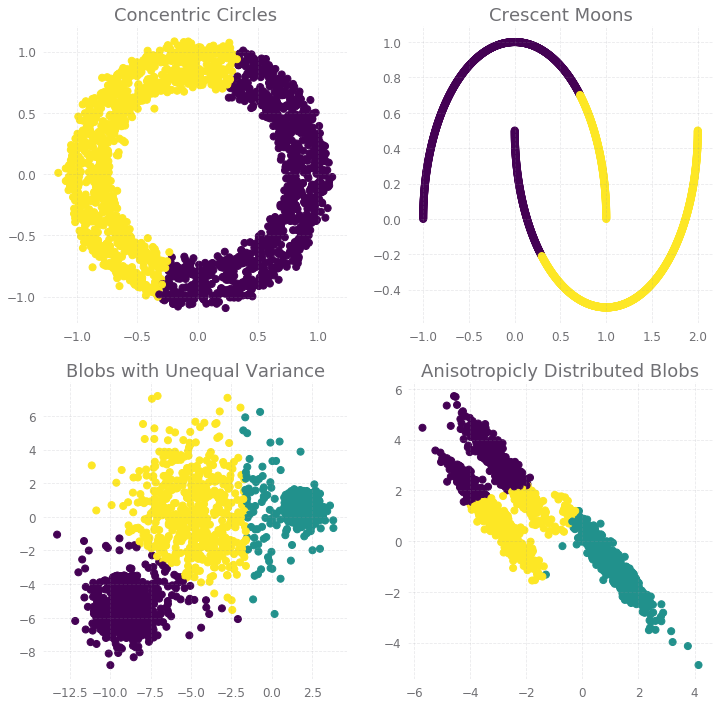

In [12]:
plt.figure(figsize=(12, 12))

y_pred = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(circles[0])
plt.subplot(221)
plt.scatter(circles[0][:, 0], circles[0][:, 1], c=y_pred)
plt.title("Concentric Circles")

y_pred = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(moons[0])
plt.subplot(222)
plt.scatter(moons[0][:, 0], moons[0][:, 1], c=y_pred)
plt.title("Crescent Moons")

y_pred = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(varied[0])
plt.subplot(223)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c=y_pred)
plt.title("Blobs with Unequal Variance")

y_pred = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(224)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")




@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}